# Intermediate pandas and some JupyterLab tips

## ToC

- [Setting up imports](#Setting-up-imports)
- [Pandas display options](#Pandas-display-options)
- [Initial textual EDA](#Initial-textual-EDA)
- [Performance profiling](#Performance-profiling)
- [Pandas styling options](#Pandas-styling-options)
- [DataFrame aggregations](#DataFrame-aggregations)
- [Working with categories](#Working-with-categories)
- [Working with strings](#Working-with-strings)
- [A few extras](#A-few-extras)
- [JupyterLab 1.0](#JupyterLab-1.0)

I will try to cover my general workflow including small things that might be skipped otherwise.

- Avoid setting conda Python first on Path for unix systems since this can interfere with other application. Instead use the conda init script to activate the environment when you need to use it.
- Use aliases for commonly accessed functions, e.g. `ca` for `conda activate`, `jl` for `jupyter-lab`.
- When presenting, vertical whitespace matters. I tend to do both maximize my browser (`F11`) and go into single document mode.
- To get to single document mode, we can use the command palette, either by clicking it in the left sidebar or by typing `Ctrl+Shift+c`.
- The command palette is great because it also show the shortcut we could use to get into single document mode directly via the shortcut `Ctrl+Shift+d`.
- When we're done with the sidebar we can close it with `Ctrl+b`.

Let's first create a markdown cell with a header. We can use the drop down menu in the tool bar or `m`, `y`, and `r` to switch between cell modes. Numbers switch between header levels.

# Setting up imports

- I usually add a few imports that I am sure I will use up front and then more as I go. If I do a lot of prototyping, I just add them in the cell I am currently working in and then move them to the first cell when I am ready to commit something.
- I usually open the object inspector on the side to get help with functions, but not for presentations because of screen real estate, instead I press `Shift+Tab` or use `?` to view docstrings.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sinfo import sinfo


sinfo() # Writes dependencies to `sinfo-requirements.txt` by default

-----
numpy     	1.16.4
pandas    	0.24.1
seaborn   	0.9.0
-----
IPython   	6.5.0
jupyter_client	5.2.3
jupyter_core	4.4.0
jupyterlab	0.35.6
notebook  	5.6.0
-----
Python 3.7.3 | packaged by conda-forge | (default, Mar 27 2019, 23:01:00) [GCC 7.3.0]
Linux-5.1.11-arch1-1-ARCH-x86_64-with-arch
4 logical CPU cores
-----
Session information updated at 2019-06-22 10:42


# Pandas display options

There are many ways to get sample data to work with, including `sklearn.datasets`, `statsmodels.datasets` (includes all R datasets), and `quilt` (a package manager for data sets). More [details can be found in this SO answer](https://stackoverflow.com/a/29956221/2166823). For small examples, I tend to use `seaborn.load_dataset()` since I will import seaborn anyways (note these datasets are just there for the `seaborn` documentation and may change without notice).

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


It is a little bit annoying to type `head()` every time I want to look at a dataframe. `pandas` has options to control the displayed data frame output and even a nice search interface to find them.

In [3]:
pd.describe_option('row')

display.latex.multirow : bool
    This specifies if the to_latex method of a Dataframe uses multirows
    to pretty-print MultiIndex rows.
    Valid values: False,True
    [default: False] [currently: False]

display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, 

In [4]:
pd.set_option('display.max_rows', 9)

We can see that this has changed the current value.

In [5]:
pd.describe_option('max_row')

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 9]




And if we type the `iris` now, we wont get flooded with 60 rows.

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


I like that this shows the beginning and the end of the data frame, as well as the dimensions (which would not show up with `head()`). The only drawback is that you need to set it back if you want to display more rows, or override it temporarily with the `pandas` options context manager.

To get the default back, we could use `pd.reset_option('max_row')`.

# Initial textual EDA

- Now that we have three headings, it can be good to check out the ToC extension. It allows us to see an overview of the document and to jump directly to specific code cell.
- Extensions like this can be installed via the command line or the new extension manager, which for now needs to be enabled in the advanced settings menu (but there will be a menu item in JL-1.0).
- Another useful extension is the spell-checking one which I have enabled, this is why some words show up in red background color.
- There is an extension that allows interactivity with `matplotlib`, for example panning and zooming.
- I also like the system-monitor topbar extension that shows how much RAM the current notebook is using and `nbdime` which shows Jupyter Notebook diffs formatted in a nice way without the json markup. The dark gruvbox theme I normally use is also available via an extension.

A good follow up from viewing the dataframe is to check if there are any `NaN` values and which data types pandas has identified (we already have a good idea from the above).

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


We can see that there are no `NaN` values since every columns has the same number of non-null entries as the number of entries in the index (150). The data types and index type match up with what we might expect from glancing at the values previously. We can find out the number of unique values in each column via `nunique()`, which is useful to understand which variables are categorical.

In [8]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

`describe()` shows descriptive summary statistics.

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Note that describe by default only show numerical columns (if there are any), but we can specify that we want to include other column types.

In [10]:
iris.describe(include='object')

,species
count,150
unique,3
top,versicolor
freq,50


We can also tell it to include all column and control the displayed percentiles.

In [11]:
iris.describe(percentiles=[0.5], include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
max,7.900000,4.400000,6.900000,2.500000,NaN


As we saw, the default behavior for `describe()` is to include all numerical columns. If there are no numerical columns, `describe()` will instead show summary statistics for whichever columns are available.

In [12]:
iris['species'].describe()

count            150
unique             3
top       versicolor
freq              50
Name: species, dtype: object

If there are many non-numerical columns, it can be tedious to write each one out. The `select_dtypes()` method can be used to get all column of a certain datatype.

In [13]:
iris.select_dtypes('number').columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [14]:
iris.select_dtypes('object').describe()

,species
count,150
unique,3
top,versicolor
freq,50


# Performance profiling 

Above we have seen three approaches to getting the summary statistics of the species column, so which one should we use? There are several factors leading into this decision, including code clarity, consistency, and performance (both memory and time). Assessing how long a chunk of code takes to run is referred to as profiling or benchmarking. We will walk through a couple of ways to do this in JupyterLab, but before we start it is important to note that code optimization should only be done when necessary, as once written by [Donald Knuth](http://wiki.c2.com/?PrematureOptimization):

> Programmers waste enormous amounts of time thinking about, or worrying about, the speed of noncritical parts of their programs, and these attempts at efficiency actually have a strong negative impact when debugging and maintenance are considered. We should forget about small efficiencies, say about 97% of the time: premature optimization is the root of all evil. Yet we should not pass up our opportunities in that critical 3%."

With that in mind, let's find out how we can profile code and find out if optimization is needed. For this example, we will compare the three `describe()` approaches above. These all run fast enough not to need optimization, but provide an instructive example for how to do profiling. With the magic functions `%timeit` and `%%timeit` we can time a line or an entire cell, respectively.

In [15]:
%%timeit
iris.select_dtypes('object').describe()

8.62 ms ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
iris.describe(include='object')

5.69 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
iris['species'].describe()

2.15 ms ± 79.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


From this benchmarking, it is clear which approach is faster and which is slowest, but we do not have a clear idea why.

In [18]:
%%prun -l 7 -s cumulative # show the top 7 lines only
iris.select_dtypes('object').describe()

         12269 function calls (12132 primitive calls) in 0.015 seconds

   Ordered by: cumulative time
   List reduced from 541 to 7 due to restriction <7>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.015    0.015 {built-in method builtins.exec}
        1    0.000    0.000    0.015    0.015 <string>:2(<module>)
        1    0.000    0.000    0.011    0.011 generic.py:9484(describe)
        2    0.000    0.000    0.007    0.003 frame.py:3205(select_dtypes)
        1    0.000    0.000    0.004    0.004 generic.py:9804(<listcomp>)
        1    0.000    0.000    0.004    0.004 generic.py:9779(describe_1d)
        1    0.000    0.000    0.004    0.004 generic.py:9752(describe_categorical_1d)

The names in parentheses indicates which function was called (`describe` is on row 3, the two before are general calls that will always be there) and the cumtime column is the cumulative time spent inside that function. This table has all the detailed timings, but it makes it difficult to get an overview of the call stack hierarchy, e.g. why was `select_dtypes()` called twice? To explore this further we can use `%%snakeviz` (this magic function comes from the third party module with the same name).

In [19]:
%load_ext snakeviz

In [20]:
%%snakeviz -t # -t is to open in new tab which is necessary in JupyterLab
iris.select_dtypes('object').describe()

 
*** Profile stats marshalled to file '/tmp/tmpxkwxk6g_'. 
Opening SnakeViz in a new tab...


In the graph, we can see the same information as with `%%prun`, but see which functions were called downstream of other functions. It is now clear that `select_dtypes()` was called once from within the `describe()` function in addition to us explicitly invoking the function.

In [21]:
%%snakeviz -t
iris.describe(include='object')

 
*** Profile stats marshalled to file '/tmp/tmpgd45l88g'. 
Opening SnakeViz in a new tab...


Here, there is only one invocation of `select_dtypes()` as expected.

In [22]:
%%snakeviz -t
iris['species'].describe()

 
*** Profile stats marshalled to file '/tmp/tmpauy1i30s'. 
Opening SnakeViz in a new tab...


Interestingly, we can see that this cell goes straight to the `describe_1d()` internal function, without having to call `select_dtypes()` and `concat()`, which saves a notable chunk of time.

Finally, we can inspect the source code to confirm the observed behavior. Any function method followed by `?` will show the docstring for that function and appending `??` will show the complete source code.

In [23]:
iris.describe??

Signature: iris.describe(percentiles=None, include=None, exclude=None)
Source:   
    def describe(self, percentiles=None, include=None, exclude=None):
        """
        Generate descriptive statistics that summarize the central tendency,
        dispersion and shape of a dataset's distribution, excluding
        ``NaN`` values.

        Analyzes both numeric and object series, as well
        as ``DataFrame`` column sets of mixed data types. The output
        will vary depending on what is provided. Refer to the notes
        below for more detail.

        Parameters
        ----------
        percentiles : list-like of numbers, optional
            The percentiles to include in the output. All should
            fall between 0 and 1. The default is
            ``[.25, .5, .75]``, which returns the 25th, 50th, and
            75th percentiles.
        include : 'all', list-like of dtypes or None (default), optional
            A white list of data types to include in the result. I

After a bit of argument checking and setting up helper functions, we get to the main part of the function. Here we can see that, if the dimensions of the input data i 1, it will directly return the output of `describe_1d()`, that is what happened when we passed the series. By default (when `include` and `exclude` both are `None`) it will use `select_dtypes()` to get all numerical columns and only use the original data frame if there were no numerical columns detected.

For long outputs or inputs it can be a good idea to collapse them to reduce the scrolling needed to navigate the notebook. This can be done by clicking the blue vertical bars to the left. Currently, collapsed input cells are still being executed, but in `JupyterLab` 1.0, they will be skipped. 

We now have a good intuition of what is happening when `describe()` is called on different input data.

# Pandas styling options

For HTML output, such as Jupyter Notebooks, dataframes can use the `style` attribute.

In [24]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [25]:
iris.corr().style.set_precision(3)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.118,0.872,0.818
sepal_width,-0.118,1,-0.428,-0.366
petal_length,0.872,-0.428,1,0.963
petal_width,0.818,-0.366,0.963,1


Note that we only changed the precision of the *displayed* numbers. The actual values in the dataframe remain the same. The styling attribute can also change the color of the background and foreground of each cell, e.g. to highlight the max values.

In [26]:
iris.corr().style.highlight_max()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.11757,0.871754,0.817941
sepal_width,-0.11757,1,-0.42844,-0.366126
petal_length,0.871754,-0.42844,1,0.962865
petal_width,0.817941,-0.366126,0.962865,1


It is also possible to create a heatmap.

In [27]:
iris.corr().style.background_gradient()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.11757,0.871754,0.817941
sepal_width,-0.11757,1,-0.42844,-0.366126
petal_length,0.871754,-0.42844,1,0.962865
petal_width,0.817941,-0.366126,0.962865,1


The style methods are configurable via parameters just like other methods.

In [28]:
iris.corr().style.background_gradient(cmap='Greens')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.11757,0.871754,0.817941
sepal_width,-0.11757,1,-0.42844,-0.366126
petal_length,0.871754,-0.42844,1,0.962865
petal_width,0.817941,-0.366126,0.962865,1


This might remind you of conditional formatting in spreadsheet software and the stylized output can actually be exported and opened in a spreadsheet program.

In [29]:
iris.corr().style.background_gradient(cmap='Greens').to_excel('style-test.xlsx')

It is also possible to append the `render()` method to output the HTML, which can then be written to file. For detailed usage of `style`, please see [this SO answer](https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas/50703596#50703596) I provided previously and the [styling section of the pandas documentation](https://pandas.pydata.org/pandas-docs/stable/style.html).

# DataFrame aggregations

Aggregations can be specified in many different ways in pandas. From highly optimized built-in functions to highly flexible arbitrary functions. If the functionality you need is available as a DataFrame method, use it. These methods tend to have their most time consuming internals written in C and thus perform very well.

In [30]:
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

`agg()` is a different interface to the built-in methods, which allows for multiple functions to be past in the same call.

In [31]:
iris.agg('mean')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [32]:
iris.agg(['mean', 'median'])

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.057333,3.758,1.199333
median,5.800000,3.000000,4.350,1.300000


If we want to use a function that is not available through `pandas`, we can use `apply()`.

While the built in aggregation methods automatically drop non-numerical values, `apply()` does not. Instead, an error is thrown with non-numerical cols.

We could drop the string columns explicitly if there are just a few.

In [33]:
iris.drop(columns='species').apply(np.mean)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

If there are many, it is easier to use `.select_dtypes()`.

In [34]:
iris_num = iris.select_dtypes('number')
iris_num.apply(np.mean)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

## User-defined functions

### Named functions

`apply()` works with any function, including those you write yourself.

In [35]:
def add_one(x):
    return x + 1

add_one(5)

6

In [36]:
iris_num.apply(add_one)

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,4.5,2.4,1.2
1,5.9,4.0,2.4,1.2
2,5.7,4.2,2.3,1.2
3,5.6,4.1,2.5,1.2
...,...,...,...,...
146,7.3,3.5,6.0,2.9
147,7.5,4.0,6.2,3.0
148,7.2,4.4,6.4,3.3
149,6.9,4.0,6.1,2.8


In [37]:
iris_num.apply(add_one) - iris_num

,sepal_length,sepal_width,petal_length,petal_width
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
...,...,...,...,...
146,1.0,1.0,1.0,1.0
147,1.0,1.0,1.0,1.0
148,1.0,1.0,1.0,1.0
149,1.0,1.0,1.0,1.0


### Unnamed lambda functions

Lambda functions can be used without being named, so they are effective for throwaway functions that you are likely to use only once.

In [38]:
(lambda x: x + 1)(5)

6

Lambda functions can be assigned to a variable name if so desired. This looks more like the standard syntax for a function definition, but lambda functions are rarely used like this.

In [39]:
my_lam = lambda x: x + 1

my_lam(5)

6

Just as with named functions, there is nothing special with the letter `x`, it is just a variable name and you can call it whatever you prefer.

In [40]:
(lambda a_descriptive_name: a_descriptive_name + 1)(5)

6

Unnamed lambda functions can be used together with apply to create any transformation to the dataframe values.

In [41]:
iris_num.apply(lambda x: x + 1)

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,4.5,2.4,1.2
1,5.9,4.0,2.4,1.2
2,5.7,4.2,2.3,1.2
3,5.6,4.1,2.5,1.2
...,...,...,...,...
146,7.3,3.5,6.0,2.9
147,7.5,4.0,6.2,3.0
148,7.2,4.4,6.4,3.3
149,6.9,4.0,6.1,2.8


We can check if they are correct by surrounding with parentheses and assert equality.

In [42]:
iris_num.apply(lambda x: x + 1) == iris_num.apply(add_one)

,sepal_length,sepal_width,petal_length,petal_width
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
...,...,...,...,...
146,True,True,True,True
147,True,True,True,True
148,True,True,True,True
149,True,True,True,True


In [43]:
(iris_num.apply(lambda x: x + 1) == iris_num.apply(add_one)).all()

sepal_length    True
sepal_width     True
petal_length    True
petal_width     True
dtype: bool

A better way to assert that two dataframes are equal is to use the `assert_frame_equal()` from `pandas.testing`.

In [44]:
# This will throw a detailed error if the assert does not pass.
pd.testing.assert_frame_equal(
    iris_num.apply(lambda x: x + 1),
    iris_num.apply(add_one))

### Row and column wise aggregations

By default, aggregation methods are applied column-wise (along the 0th axis), but can be set to work row-wise instead.

In [45]:
# The row with the highest value in for each column.
iris_num.idxmax()  # Same as axis=0

sepal_length    131
sepal_width      15
petal_length    118
petal_width     100
dtype: int64

In [46]:
# The column with the highest value in for each row.
iris_num.idxmax(axis=1)

0      sepal_length
1      sepal_length
2      sepal_length
3      sepal_length
           ...     
146    sepal_length
147    sepal_length
148    sepal_length
149    sepal_length
Length: 150, dtype: object

Sepal length seems to be the highest value for all rows,which we can confirm with `value_counts()`.

In [47]:
iris_num.idxmax(axis=1).value_counts()

sepal_length    150
dtype: int64

Be careful when using apply to iterate over rows. This operation is very inefficient and there is often another simpler solution that takes advantage of the optimized pandas functions to create significant speedups.

In [48]:
%%timeit
iris.apply(lambda x: x['sepal_length'] + x['sepal_width'], axis=1)

5.23 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
%%timeit
iris['sepal_length'] + iris['sepal_width']

158 µs ± 6.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [50]:
# Test if apply and column addition gives the same result
pd.testing.assert_series_equal(
    iris.apply(lambda x: x['sepal_length'] + x['sepal_width'], axis=1),
    iris['sepal_length'] + iris['sepal_width'])

# Working with categories

For this we will work with the titanic dataset from kaggle. It can be downloaded from their site or via different github users who have mirrored the data in their repos.

In [51]:
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
# Convert column names to lower case, more on `str` later
titanic.columns = titanic.columns.str.lower()
# Drop columns that we won't use
titanic = titanic.drop(columns=['passengerid', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked'])
titanic

,survived,pclass,name,sex,age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
...,...,...,...,...,...
887,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0
890,0,3,"Dooley, Mr. Patrick",male,32.0


In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


How should we interpret the `+` sign under memory usage? In the docstring for `info()`, there is one option that affects memory usage, let's try it.

In [53]:
titanic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 147.7 KB


What happened? Why is the memory usage listed as around six times what we saw previously? The `info()` method's docstring explains why:

> Without deep introspection a memory estimation is made based in column dtype and number of rows assuming values consume the same memory amount for corresponding dtypes. With deep memory introspection, a real memory usage calculation is performed at the cost of computational resources.

So deep memory introspection shows the real memory usage, but it is still a bit cryptic what part of the dataframe's size was hidden previously. To find this out, it is helpful to understand that `pandas` dataframes essentially consist of `numpy` arrays held together with the `pandas` dataframe block manager. Knowing that, it would be interesting to inspect whether any of the columns (the separate `numpy` arrays) report different size measures with and without deep memory introspection. Instead of the more general `info()` method, we can use the more specific `memory_usage()` method to find this out.

In [54]:
titanic.memory_usage()

Index         80
survived    7128
pclass      7128
name        7128
sex         7128
age         7128
dtype: int64

In [55]:
titanic.memory_usage(deep=True)

Index          80
survived     7128
pclass       7128
name        74813
sex         54979
age          7128
dtype: int64

From this, it is clear that it is the `name`, `sex`, and `pclass` columns that change, everything else remains the same. To understand what is happening, we first need to know that a `numpy` array is stored in the computer's memory as a contiguous (uninterrupted) segment. This is one of the reasons why `numpy` is so fast, it only needs to find the start of the array and then access a sequential length from the start point instead of trying to look up every single object (which is how a lists work in Python). This is well illustrated in the figure below from the Python Data Science Handbook.

![](./img/array_vs_list.png)

[Image source](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)

In order for `numpy` to store objects contiguously in memory, it needs to allocate the same fixed number of bits for each object in the array. For example, to store a binary value, only one bit would be required which can be either zero or one. To store integers, it is however many bits are needed to count up to that integer, e.g. two bits for the number 3 (`11` in binary), three bits for the number 4 (`100` in binary). By default, `numpy` will store integer values in arrays as the 64-bit integer data type, which accommodates values up to $2^{64}$ (around $18*10^{18}$).

![](img/binary-count.png)

[Image source](https://en.wikipedia.org/wiki/Binary-coded_decimal)

This is fine for integers (up to a certain size) or floats (up to a certain precision), but with strings of variable length (and more complex object such as lists and dictionaries), `numpy` cannot fit them into the fixed sized chunks in an effective manner (strings of fixed length would technically work fine) and the actual string object is stored outside the array. So what is inside the array? Just a reference (also called a pointer) to where in memory the actual object is stored and these references are of a fixed size:

![](./img/int-vs-pointer-memory-lookup.png)

[Image source](https://stackoverflow.com/questions/21018654/strings-in-a-dataframe-but-dtype-is-object/21020411#21020411)

When we indicate that we want to use the deep memory introspection, `pandas` finds and calculates the size of each of the objects that the array references point to. With the shallow introspection, it simply reports the memory consumption of the references that are actually stored in the array (and by default these are the same 64-bit size as the default for the integers and floats). 

Note that memory usage is not the same as disk usage. Objects can take up additional space in memory depending on how they are constructed.

In [56]:
ls -lh titanic.csv

-rw-r--r-- 1 joel users 40K Jun 21 12:08 titanic.csv


For columns with a unique string for each row, there is currently no way around storing these as the object dtype. This is the case for the `name` column in the titanic dataset. However, columns with repeating strings can preferentially be treated as categoricals, which both reduces memory usage and enables additional functionality. For example, for the `sex` column, it is inefficient to store `'Male'` and `'Female'` for each row, especially taking into account the memory storage limitations mentioned above. Instead, it would be beneficial to store and integer for each row, and then have a separate dictionary that translates these integer into their respective strings (which are only stored once).

`Categorical` can be used to convert a string-based object column into categorical values.

In [57]:
pd.Categorical(titanic['sex'])

[male, female, female, female, male, ..., male, female, female, male, male]
Length: 891
Categories (2, object): [female, male]

In [58]:
titanic['sex'] = pd.Categorical(titanic['sex'])

In [59]:
titanic.dtypes

survived       int64
pclass         int64
name          object
sex         category
age          float64
dtype: object

The dtype has now changed to `category`.

In [60]:
titanic.memory_usage(deep=True)

Index          80
survived     7128
pclass       7128
name        74813
sex          1095
age          7128
dtype: int64

The `sex` column takes up 50x less space in memory after being converted to a categorical dtype. It actually even takes up less space than the other integer columns, how is that possible? The answer is that when storing integers, `pandas` by default uses 64-bit precision to allow for large numbers to be stored (and added to the dataframe without making a new copy). When creating the categorical series, `pandas` uses the lowest needed precision (`int8` in this case) since it is unlikely that so many new categories will be added that this storage format reaches its limitation (which for `int8` is 256 values).

In [61]:
titanic['sex'].cat.codes

0      1
1      0
2      0
3      0
      ..
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

Note that if we try to store an object with unique strings as a category, we actually *increase* the memory usage, because we are still storing all the unique strings once in the dictionary, and on top of that we have added a unique number for each string.

In [62]:
titanic['cat_name'] = pd.Categorical(titanic['name'])
titanic.memory_usage(deep=True)

Index           80
survived      7128
pclass        7128
name         74813
sex           1095
age           7128
cat_name    117555
dtype: int64

In addition to memory savings, categories are beneficial for certain types of operations. In the titanic dataset, there are a few more variables that does not have the correct data type.

In [63]:
titanic

,survived,pclass,name,sex,age,cat_name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,"Braund, Mr. Owen Harris"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,"Heikkinen, Miss. Laina",female,26.0,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
...,...,...,...,...,...,...
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,"Graham, Miss. Margaret Edith"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,1,"Behr, Mr. Karl Howell",male,26.0,"Behr, Mr. Karl Howell"
890,0,3,"Dooley, Mr. Patrick",male,32.0,"Dooley, Mr. Patrick"


`survived` and `pclass` are not numerical variables, they are categorical. `survived` can be stored as a boolean variable, which takes exactly one byte per row.

In [64]:
titanic['survived'] = titanic['survived'].astype('bool')
titanic.memory_usage(deep=True)

Index           80
survived       891
pclass        7128
name         74813
sex           1095
age           7128
cat_name    117555
dtype: int64

Survived is stored as `int8` and is exactly 1/8th of the integer columns since there is no overhead from storing the categorical mapping dictionary.

In [65]:
7128 / 891

8.0

`pclass` is an ordered categorical, where first class is the highest class and third class is the lowest. Note that this is not the same as a numerical, e.g. it is non-sensical to say that second class is double first class.

In [66]:
pd.Categorical(titanic['pclass'], categories=['3rd', '2nd', '1st'], ordered=True)

[NaN, NaN, NaN, NaN, NaN, ..., NaN, NaN, NaN, NaN, NaN]
Length: 891
Categories (3, object): [3rd < 2nd < 1st]

In [67]:
titanic['pclass'] = pd.Categorical(titanic['pclass'], categories=['3rd', '2nd', '1st'], ordered=True)

With an ordered categorical, comparisons can be made. We can get everything that is higher than third class.

In [68]:
# Note that comparisons with string also work, but it is just comparing alphabetical order.
titanic['pclass'][titanic['pclass'] > '3rd'].value_counts()

1st    0
2nd    0
3rd    0
Name: pclass, dtype: int64

The order is also respected by pandas and seaborn, such as in the sort performed by default in groupby.

In [69]:
titanic.groupby('pclass').size()

pclass
3rd    0
2nd    0
1st    0
dtype: int64

In [70]:
titanic.groupby('pclass').describe()

age                             
       count mean std min 25% 50% 75% max
pclass                                   
3rd      0.0  NaN NaN NaN NaN NaN NaN NaN
2nd      0.0  NaN NaN NaN NaN NaN NaN NaN
1st      0.0  NaN NaN NaN NaN NaN NaN NaN

For methods that don't sort, this will not be in order, e.g. `groupby.head()`.

In [71]:
titanic.groupby('pclass').head(2)

,survived,pclass,name,sex,age,cat_name
0,False,NaN,"Braund, Mr. Owen Harris",male,22.0,"Braund, Mr. Owen Harris"
1,True,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."


`values_counts()` sorts based on value, not index.

In [72]:
titanic['pclass'].value_counts(normalize=True)

1st   NaN
2nd   NaN
3rd   NaN
Name: pclass, dtype: float64

Which we can see if we profile it.

In [73]:
%%prun -l 5
titanic['pclass'].value_counts(normalize=True)

         2235 function calls (2205 primitive calls) in 0.003 seconds

   Ordered by: internal time
   List reduced from 234 to 5 due to restriction <5>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.002    0.002 series.py:2668(sort_values)
      406    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        6    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.001    0.001 categorical.py:1455(value_counts)
      213    0.000    0.000    0.000    0.000 generic.py:7(_check)

seaborn will also sort the values according to the categorical order from left to right.

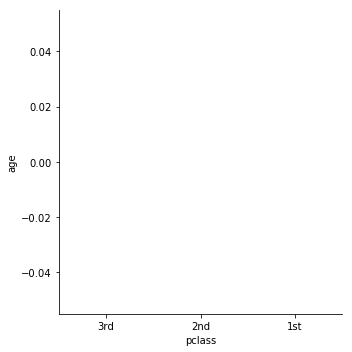

In [74]:
sns.catplot(x='pclass', y='age', data=titanic, kind='swarm')

When `catplot()` was added for categorical plots, the `seaborn` author also added another human companion plot as an easter egg.

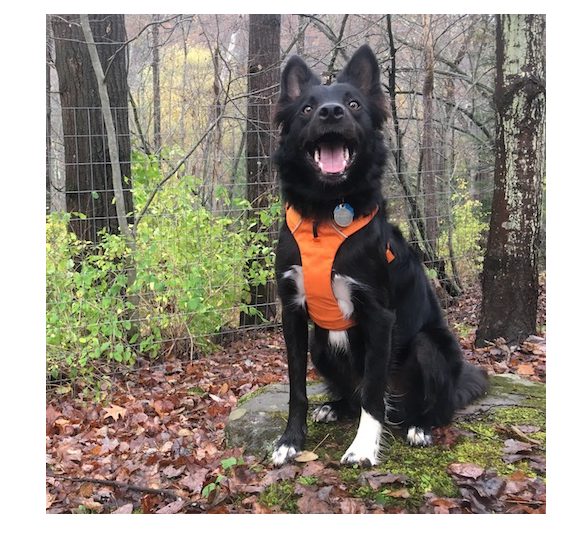

In [75]:
sns.dogplot()

# Working with strings

As a general purpose programming language, Python has many powerful built-in string methods that can be accessed from any string object.

In [76]:
'First Last'.lower()

'first last'

We could use these with dataframes, via `apply()`.

In [77]:
titanic['name'].apply(lambda x: x.lower())

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
                             ...                        
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: name, Length: 891, dtype: object

However, `pandas` has a built-in accessor attribute, which gives access to these string methods (and some special ones) in a more convenient syntax.

In [78]:
titanic['name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
                             ...                        
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: name, Length: 891, dtype: object

Note that these work on Series, not dataframes. So either use on one series at a time or a dataframe with a lambda experssion.

## What are the longest lastnames in the titanic datasets?

To find this out, we need to split first and last names from the `name` column.

In [79]:
titanic['name'].str.split(',')

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
                             ...                        
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: name, Length: 891, dtype: object

That return a series of lists holding the first and last name. By specifying `expand=True`, the list will expand into two separate columns.

In [80]:
titanic['name'].str.split(',', expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
...,...,...
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell
890,Dooley,Mr. Patrick


Another way of doing this is with `partition()` which expands by default. However, it also includes the separator in its own column, so it is not ideal for our purposes here, but we will be using it later.

In [81]:
titanic['name'].str.partition(',')

,0,1,2
0,Braund,",",Mr. Owen Harris
1,Cumings,",",Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,",",Miss. Laina
3,Futrelle,",",Mrs. Jacques Heath (Lily May Peel)
...,...,...,...
887,Graham,",",Miss. Margaret Edith
888,Johnston,",","Miss. Catherine Helen ""Carrie"""
889,Behr,",",Mr. Karl Howell
890,Dooley,",",Mr. Patrick


The output can be assigned to multiple columns.

In [82]:
titanic[['lastname', 'firstname']] = titanic['name'].str.split(',', expand=True)
titanic

,survived,pclass,name,sex,age,cat_name,lastname,firstname
0,False,NaN,"Braund, Mr. Owen Harris",male,22.0,"Braund, Mr. Owen Harris",Braund,Mr. Owen Harris
1,True,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,True,NaN,"Heikkinen, Miss. Laina",female,26.0,"Heikkinen, Miss. Laina",Heikkinen,Miss. Laina
3,True,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs. Jacques Heath (Lily May Peel)
...,...,...,...,...,...,...,...,...
887,True,NaN,"Graham, Miss. Margaret Edith",female,19.0,"Graham, Miss. Margaret Edith",Graham,Miss. Margaret Edith
888,False,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,"Miss. Catherine Helen ""Carrie"""
889,True,NaN,"Behr, Mr. Karl Howell",male,26.0,"Behr, Mr. Karl Howell",Behr,Mr. Karl Howell
890,False,NaN,"Dooley, Mr. Patrick",male,32.0,"Dooley, Mr. Patrick",Dooley,Mr. Patrick


The `len()` method gives the length of each string.

In [83]:
titanic['lastname_length'] = titanic['lastname'].str.len()
titanic

,survived,pclass,name,sex,age,cat_name,lastname,firstname,lastname_length
0,False,NaN,"Braund, Mr. Owen Harris",male,22.0,"Braund, Mr. Owen Harris",Braund,Mr. Owen Harris,6
1,True,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs. John Bradley (Florence Briggs Thayer),7
2,True,NaN,"Heikkinen, Miss. Laina",female,26.0,"Heikkinen, Miss. Laina",Heikkinen,Miss. Laina,9
3,True,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs. Jacques Heath (Lily May Peel),8
...,...,...,...,...,...,...,...,...,...
887,True,NaN,"Graham, Miss. Margaret Edith",female,19.0,"Graham, Miss. Margaret Edith",Graham,Miss. Margaret Edith,6
888,False,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,"Miss. Catherine Helen ""Carrie""",8
889,True,NaN,"Behr, Mr. Karl Howell",male,26.0,"Behr, Mr. Karl Howell",Behr,Mr. Karl Howell,4
890,False,NaN,"Dooley, Mr. Patrick",male,32.0,"Dooley, Mr. Patrick",Dooley,Mr. Patrick,6


We can see if it worked by looking at the top few values.

In [84]:
titanic.sort_values('lastname_length', ascending=False).head()

,survived,pclass,name,sex,age,cat_name,lastname,firstname,lastname_length
430,True,NaN,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",Bjornstrom-Steffansson,Mr. Mauritz Hakan,22
444,True,NaN,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,"Johannesen-Bratthammer, Mr. Bernt",Johannesen-Bratthammer,Mr. Bernt,22
505,False,NaN,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,"Penasco y Castellana, Mr. Victor de Satode",Penasco y Castellana,Mr. Victor de Satode,20
307,True,NaN,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,"Penasco y Castellana, Mrs. Victor de Satode (M...",Penasco y Castellana,Mrs. Victor de Satode (Maria Josefa Perez de ...,20
351,False,NaN,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,"Williams-Lambert, Mr. Fletcher Fellows",Williams-Lambert,Mr. Fletcher Fellows,16


A shortcut for sorting, that also performs better, is to use `nlargest()`.

In [85]:
titanic.nlargest(5, 'lastname_length')

,survived,pclass,name,sex,age,cat_name,lastname,firstname,lastname_length
430,True,NaN,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",Bjornstrom-Steffansson,Mr. Mauritz Hakan,22
444,True,NaN,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,"Johannesen-Bratthammer, Mr. Bernt",Johannesen-Bratthammer,Mr. Bernt,22
307,True,NaN,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,"Penasco y Castellana, Mrs. Victor de Satode (M...",Penasco y Castellana,Mrs. Victor de Satode (Maria Josefa Perez de ...,20
505,False,NaN,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,"Penasco y Castellana, Mr. Victor de Satode",Penasco y Castellana,Mr. Victor de Satode,20
351,False,NaN,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,"Williams-Lambert, Mr. Fletcher Fellows",Williams-Lambert,Mr. Fletcher Fellows,16


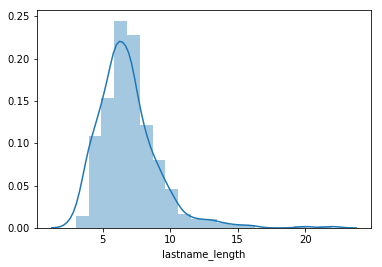

In [86]:
sns.distplot(titanic['lastname_length'], bins=20)

`pandas` also includes useful method to answer how many people have the same lastname.

In [87]:
titanic['lastname'].value_counts()

Andersson     9
Sage          7
Carter        6
Panula        6
             ..
Fox           1
Augustsson    1
Mayne         1
McGough       1
Name: lastname, Length: 667, dtype: int64

Nine people are named `'Andersson'`.

In [88]:
titanic['lastname'].value_counts().value_counts()

1    534
2     83
3     28
4     14
6      5
9      1
7      1
5      1
Name: lastname, dtype: int64

The most common scenario is that only one person has any given last name, but overall there are more than 100 people that share last name with someone else. With `duplicated()` we can view all the entries for people sharing last names.

In [89]:
titanic[titanic.duplicated('lastname', keep=False)].sort_values(['lastname'])

,survived,pclass,name,sex,age,cat_name,lastname,firstname,lastname_length
279,True,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,"Abbott, Mrs. Stanton (Rosa Hunt)",Abbott,Mrs. Stanton (Rosa Hunt),6
746,False,NaN,"Abbott, Mr. Rossmore Edward",male,16.0,"Abbott, Mr. Rossmore Edward",Abbott,Mr. Rossmore Edward,6
874,True,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,"Abelson, Mrs. Samuel (Hannah Wizosky)",Abelson,Mrs. Samuel (Hannah Wizosky),7
308,False,NaN,"Abelson, Mr. Samuel",male,30.0,"Abelson, Mr. Samuel",Abelson,Mr. Samuel,7
...,...,...,...,...,...,...,...,...,...
830,True,NaN,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",Yasbeck,Mrs. Antoni (Selini Alexander),7
620,False,NaN,"Yasbeck, Mr. Antoni",male,27.0,"Yasbeck, Mr. Antoni",Yasbeck,Mr. Antoni,7
111,False,NaN,"Zabour, Miss. Hileni",female,14.5,"Zabour, Miss. Hileni",Zabour,Miss. Hileni,6
240,False,NaN,"Zabour, Miss. Thamine",female,NaN,"Zabour, Miss. Thamine",Zabour,Miss. Thamine,6


It seems like lastname duplication can be due to female passengers being registered under their husbands lastname. To get an idea of how many occurrences there of female passengers with the title `Mrs.` and a parenthesis in their last name (indicating another maiden name), we can use the `str.contains` method. Let's start with just the parenthesis.

In [90]:
titanic.loc[titanic['name'].str.contains('\('), 'sex'].value_counts()

female    129
male       14
Name: sex, dtype: int64

It is mostly female passengers who have a parentheses in the name.

## Multi-line method chaining

Before we proceed, a note about multiline-method chaining in `pandas`. Method chaining is when multiple methods are appended after each other like we did in the cell above. This can be done in one line, but often it is preferential to spread it out over multiple lines.

Multi-line statements can be formatted in a few different ways in Python, e.g. we could use the explicit line continuation character `\` for a syntax similar to how R uses `%>%`.

In [91]:
titanic \
    .loc[titanic['name'].str.contains('\('), 'sex'] \
    .value_counts()

female    129
male       14
Name: sex, dtype: int64

This is perfectly fine according to the style guides and readable so feel free to use this style if it is easy to remember due it's similarity to pipes in `dplyr`. More common in Python is to use implicit line continuation with an open `(` to indicate the line continues below.

In [92]:
(titanic
    .loc[titanic['name'].str.contains('\('), 'sex']
    .value_counts())

female    129
male       14
Name: sex, dtype: int64

One of the advantages here is that we don't have to remember to put a continuation character on each lines when we add new lines. The closing `)` could also be put a new line for maximal flexibility.

To find out how many passengers do not have a `(` in their name, we can use the `~` operator to negate (or invert) the boolean expression generated with `contains()`. 

In [93]:
(titanic
    .loc[~titanic['name'].str.contains('\('), 'sex']
    .value_counts())

male      563
female    185
Name: sex, dtype: int64

In [94]:
# `value_counts()` can also create normalized counts.
(titanic
    .loc[titanic['name'].str.contains('\('), 'sex']
    .value_counts(normalize=True))

female    0.902098
male      0.097902
Name: sex, dtype: float64

Note that in the above examples we have selected both the rows and the columns by separating them with a comma within a single call to `loc[]`. It is important to select them this way rather than using multiple chained calls or selecting columns with `[]` afterwards, since these approaches might give you a `SettingWithCopyWarning` when trying to modify these dataframe subsets. The reason for this is that `pandas` does not know if you are operating on a new (copy) dataframe or trying to change values within the original data frame.

There seems to be several reasons for parenthesis in the name. The ones we want to change are the ones who have 'Mrs' and a parenthesis in the name. To combine boolean expression we can surround each one with `()` and then use the bitwise comparison operators: `&` for "and", `|` for "or".  These compare each row for the two separate boolean expressions and outputs a single boolean matrix.

In [95]:
(titanic
    .loc[(titanic['name'].str.contains('\('))
        & (titanic['name'].str.contains('Mrs'))
        , 'sex']  # On a separate row for clarity
    .value_counts())

female    125
male        0
Name: sex, dtype: int64

Dropped all male and 4 female passengers. Which females were dropped?

In [96]:
(titanic
    .loc[(titanic['name'].str.contains('\('))
        & (~titanic['name'].str.contains('Mrs'))
        & (titanic['sex'] == 'female')
        , 'name'])

381                          Nakid, Miss. Maria ("Mary")
564                       Meanwell, Miss. (Marion Ogden)
759    Rothes, the Countess. of (Lucy Noel Martha Dye...
796                          Leader, Dr. Alice (Farnham)
Name: name, dtype: object

Even more precisely, we only want to keep the ones with a last and first name in the parentheses. We can use the fact that these seems to be separated by a space. `contains` accepts regular expression, and we will use `.*` which means "match any characters", similar to how wildcards work in the Unix shell.

In [97]:
# Explain regex above
# titanic.loc[(titanic['name'].str.contains('\(')) & (titanic['sex'] == 'female'), 'sex'].value_counts()
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'sex']
    .value_counts())

female    111
male        0
Name: sex, dtype: int64

From these passengers, we can extract the name in the parenthesis using `partition`, which we saw previously.

In [98]:
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.partition('(')[2])

1         Florence Briggs Thayer)
3                  Lily May Peel)
8      Elisabeth Vilhelmina Berg)
9                    Adele Achem)
                  ...            
874               Hannah Wizosky)
879         Lily Alexenia Wilson)
880         Imanita Parrish Hall)
885              Margaret Norton)
Name: 2, Length: 111, dtype: object

In [99]:
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.partition('(')[2]
    .str.partition(')')[0])

1         Florence Briggs Thayer
3                  Lily May Peel
8      Elisabeth Vilhelmina Berg
9                    Adele Achem
                 ...            
874               Hannah Wizosky
879         Lily Alexenia Wilson
880         Imanita Parrish Hall
885              Margaret Norton
Name: 0, Length: 111, dtype: object

In this case I could also have used string indexing to strip the last character, but this would give us issues if there are spaces at the end.

In [100]:
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.partition('(')[2]
    .str[:-1]
)

1         Florence Briggs Thayer
3                  Lily May Peel
8      Elisabeth Vilhelmina Berg
9                    Adele Achem
                 ...            
874               Hannah Wizosky
879         Lily Alexenia Wilson
880         Imanita Parrish Hall
885              Margaret Norton
Name: 2, Length: 111, dtype: object

There is a more advanced way of getting this with regex directly, using a matching group to find anything in the parenthesis.

In [101]:
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.extract("\((.+)\)"))

,0
1,Florence Briggs Thayer
3,Lily May Peel
8,Elisabeth Vilhelmina Berg
9,Adele Achem
...,...
874,Hannah Wizosky
879,Lily Alexenia Wilson
880,Imanita Parrish Hall
885,Margaret Norton


The two step partition method is perfectly fine, and regex can feel a bit magical sometime, but it is good to know about if you end up working a lot with strings or need to extract complicated patterns.

Now lets get just the last names from this column and assign them back to the dataframe.

In [102]:
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.partition('(')[2]
    .str.partition(')')[0]
    .str.rsplit(n=1, expand=True))

,0,1
1,Florence Briggs,Thayer
3,Lily May,Peel
8,Elisabeth Vilhelmina,Berg
9,Adele,Achem
...,...,...
874,Hannah,Wizosky
879,Lily Alexenia,Wilson
880,Imanita Parrish,Hall
885,Margaret,Norton


All the lastnames without parenthsis will remain the same and we will only overwrite those that match the criteria we set up above.

In [103]:
titanic['real_last'] = titanic['lastname']
# Assign boolean to var name for clarity
mrs_paren = titanic['name'].str.contains('Mrs.*\(.* .*\)')

titanic.loc[mrs_paren, 'real_last'] = (titanic
    .loc[mrs_paren, 'name']
    .str.partition('(')[2]
    .str.partition(')')[0]
    .str.rsplit(n=1, expand=True)[1])

In [104]:
titanic

,survived,pclass,name,sex,age,cat_name,lastname,firstname,lastname_length,real_last
0,False,NaN,"Braund, Mr. Owen Harris",male,22.0,"Braund, Mr. Owen Harris",Braund,Mr. Owen Harris,6,Braund
1,True,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs. John Bradley (Florence Briggs Thayer),7,Thayer
2,True,NaN,"Heikkinen, Miss. Laina",female,26.0,"Heikkinen, Miss. Laina",Heikkinen,Miss. Laina,9,Heikkinen
3,True,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs. Jacques Heath (Lily May Peel),8,Peel
...,...,...,...,...,...,...,...,...,...,...
887,True,NaN,"Graham, Miss. Margaret Edith",female,19.0,"Graham, Miss. Margaret Edith",Graham,Miss. Margaret Edith,6,Graham
888,False,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,"Miss. Catherine Helen ""Carrie""",8,Johnston
889,True,NaN,"Behr, Mr. Karl Howell",male,26.0,"Behr, Mr. Karl Howell",Behr,Mr. Karl Howell,4,Behr
890,False,NaN,"Dooley, Mr. Patrick",male,32.0,"Dooley, Mr. Patrick",Dooley,Mr. Patrick,6,Dooley


This seems to have worked as we expected, passengers with "Mrs" in their name have a new value under `real_last`, but others don't.

In [105]:
titanic['lastname'].value_counts().value_counts()

1    534
2     83
3     28
4     14
6      5
9      1
7      1
5      1
Name: lastname, dtype: int64

In [106]:
titanic['real_last'].value_counts().value_counts()

1    598
2     70
3     23
4     11
5      5
8      1
7      1
Name: real_last, dtype: int64

The value counts also changed slightly. Note that this comparison is not ideal, since female passengers who got updated with a new lastname might still share that lastname with some other passengers on the boat.

We can visualize the results with a paired barplot of counts.

value       
                      mean median
variable                         
lastname_length   6.735669      7
real_last_length  6.668790      7

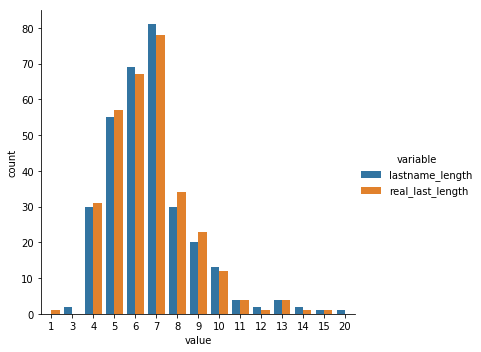

In [107]:
titanic['real_last_length'] = titanic['real_last'].str.len()

titanic_long = (titanic
    .loc[titanic['sex'] == 'female']
    .melt(value_vars=['lastname_length', 'real_last_length']))
sns.catplot(x='value', hue='variable', data=titanic_long, kind='count')

titanic_long.groupby('variable').agg(['mean', 'median'])

# A few extras

In [108]:
# Convert upper case column names to lower case and replace spaces with underscores
# import re
# titanic.rename(columns=lambda x: re.sub('(?!^)([A-Z]+)', r'_\1', x).lower())

In [109]:
# For easier version control, this can be run in the last notebook cell (or use jupytext)
!jupyter-nbconvert mds-seminar-apply-cat-str.ipynb --to python

[NbConvertApp] Converting notebook mds-seminar-apply-cat-str.ipynb to python
[NbConvertApp] Writing 35385 bytes to mds-seminar-apply-cat-str.py


# JupyterLab 1.0

- Search and replace in the entire notebook!
- Code folding in text files and notebooks, e.g. to collapse a loop.
- Insert colored banners with HTML divs (Bootstrap-like functionality).
- Status bar.
- Printing directly from the notebook.
- Inspector renamed Interactive Help.
- Menu item to enable the extension manager.
- Rulers to keep an eye on code length.
- Scroll past the end of notebooks.